In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('indian_food.csv')
df


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [8]:
df.dtypes


name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [13]:
df['diet'].nunique()


2

In [81]:
#data clean.. remove rows with null value  (value -1)


for x in df.index:
  if df.loc[x, "prep_time"] < 0:
    df.drop(x, inplace = True)

    
for x in df.index:
  if df.loc[x, "flavor_profile"] == '-1':
    df.drop(x, inplace = True)
    
for x in df.index:
  if df.loc[x, "region"] == '-1':
    df.drop(x, inplace = True)    
df    

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West


In [78]:
#count various taste => in india spicy flavor is favorite

df['name'].groupby(df['flavor_profile']).count().sort_values(ascending=False)

flavor_profile
spicy     116
sweet      80
bitter      4
sour        1
Name: name, dtype: int64

In [91]:
#getting information how many various food in each region => west region has much various food

 df['name'].groupby(df['region']).count().sort_values(ascending=False)


region
West          60
North         46
South         45
East          25
North East    10
Central        3
Name: name, dtype: int64

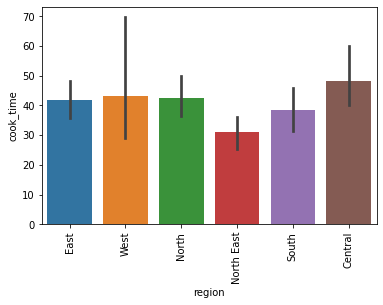

In [96]:




sns.barplot(x=df['region'], y=df['cook_time'])
plt.xticks(rotation="vertical")
plt.show()

In [105]:
#find max cook time per region

df.groupby(['region'])['cook_time'].max().reset_index()




,region,cook_time
0,Central,60
1,East,90
2,North,120
3,North East,45
4,South,120
5,West,720


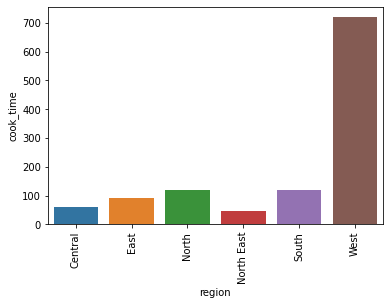

In [109]:
df2 = df.groupby(['region'])['cook_time'].max().reset_index()
df2['cook_time']  # create new dataframe for create new agregation



sns.barplot(x=df2['region'], y=df2['cook_time'])
plt.xticks(rotation="vertical")
plt.show()

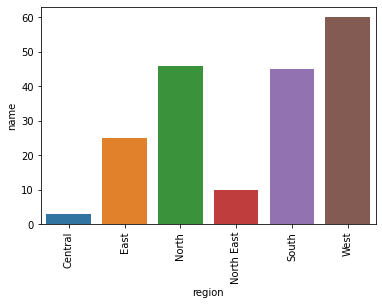

In [111]:
#Total vaious food name in each region 

df.groupby(['region'])['name'].count().reset_index()
df3 = df.groupby(['region'])['name'].count().reset_index()

sns.barplot(x=df3['region'], y=df3['name'])
plt.xticks(rotation="vertical")
plt.show()